<a href="https://colab.research.google.com/github/Mwaniki25/Hypothesis-test-on-bluecars/blob/main/IP_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Importing Libraries
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
auto = pd.read_csv('auto.csv')
auto.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#  Checking the data frame shape
auto.shape

(16085, 13)

In [ ]:
#  Checking data types 
auto.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# checking for duplicates
auto.duplicated().any()

False

In [ ]:
# checking for missing values
auto.isnull().any().sum()

0

In [ ]:
auto.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Making the column names uniform.

auto.columns = auto.columns.str.replace(' ', '_').str.replace('dayOfWeek', 'day_of_week').str.strip().str.lower()  # Dealing with the inconsistencies

auto.columns      # Displaying column names

Index(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# Dropping Uneccessary columns 
auto.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
auto.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117


In [ ]:
Q1 =  auto['bluecars_taken_sum'].quantile(0.25)
Q3 = auto['bluecars_taken_sum'].quantile(0.75)
IQR = Q3 - Q1
auto[(auto['bluecars_taken_sum'] < Q1-1.5*IQR ) | (auto['bluecars_taken_sum'] > Q3+1.5*IQR)]['bluecars_taken_sum'].count()

2215

In [ ]:
#Dropping the outliers
drop= (auto['bluecars_taken_sum'] >= Q1 - 1.5 * IQR) & (auto['bluecars_taken_sum'] <= Q3 + 1.5 *IQR)
auto = auto.loc[drop]  
auto

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
Q1 =  auto['bluecars_returned_sum'].quantile(0.25)
Q3 = auto['bluecars_returned_sum'].quantile(0.75)
IQR = Q3 - Q1
auto[(auto['bluecars_returned_sum'] < Q1-1.5*IQR ) | (auto['bluecars_returned_sum'] > Q3+1.5*IQR)]['bluecars_returned_sum'].count()

1060

In [ ]:
#Dropping the outliers
drop= (auto['bluecars_returned_sum'] >= Q1 - 1.5 * IQR) & (auto['bluecars_returned_sum'] <= Q3 + 1.5 *IQR)
auto = auto.loc[drop]  
auto

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [ ]:
auto.shape

(12810, 5)

In [ ]:
16085 - 12810

3275

In [ ]:
# Converting the day of week from from numericals to strings for plotting
# This is done using the mapping function
# 

auto['day_of_week'] = auto.day_of_week.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',5:'Saturday',6:'Sunday'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Univariate analysis


In [ ]:
auto.day_type.value_counts(normalize=True)

weekday    0.726386
weekend    0.273614
Name: day_type, dtype: float64

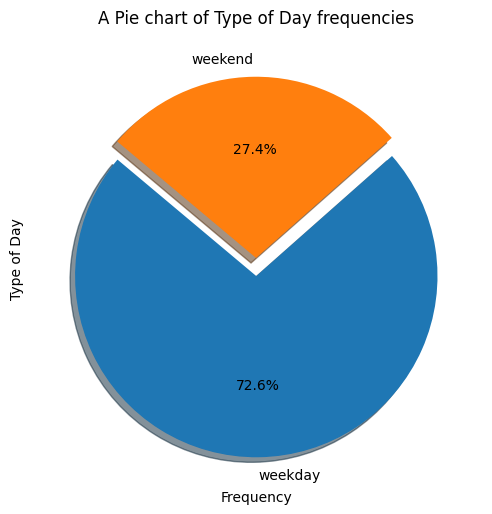

In [ ]:
# Counting the day of week values
days = auto.day_type.value_counts()
days

# accessing the data to plot

# Creating our labels
labels = days.index
labels

# Creating our values
auto2= days.values
auto2



plt.figure(figsize = (6,6), dpi = 100)
plt.pie(auto2, labels = labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 140)
plt.ylabel("Type of Day")
plt.xlabel('Frequency')
plt.title("A Pie chart of Type of Day frequencies")
plt.show()

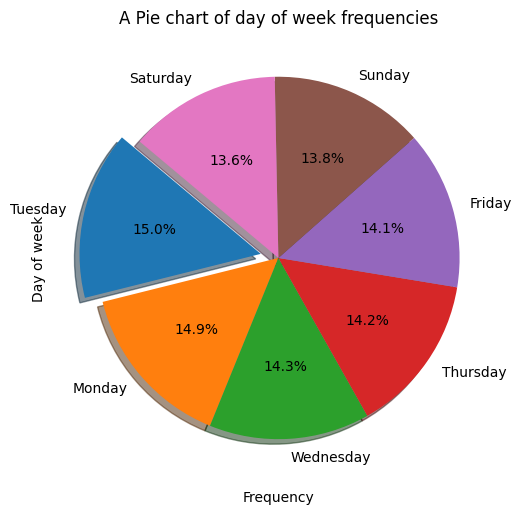

In [ ]:
# Counting the day of week values
days = auto.day_of_week.value_counts()
days

# accessing the data to plot

# Creating our labels
labels = days.index
labels

# Creating our values
auto2= days.values
auto2



plt.figure(figsize = (6,6), dpi = 100)
plt.pie(auto2, labels = labels, autopct = '%1.1f%%', shadow = True, explode = (0.1,0,0,0,0,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

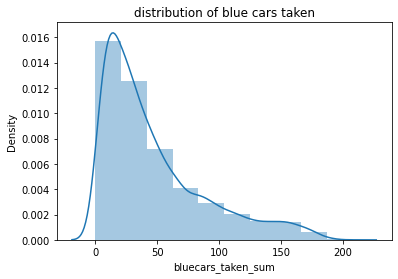

In [ ]:
# Plot bluecars taken
sns.distplot(auto['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

### Measures  of Central tendency


In [ ]:
#  Mean, mode and median for Returned Blue Cars
print('The mean for returned cars', auto.bluecars_returned_sum.mean())
print('The median for returned cars',auto.bluecars_returned_sum.median())
print('The mode for returned cars', auto.bluecars_returned_sum.mode())
print('The std for returned cars', auto.bluecars_returned_sum.std())

The mean for returned cars 46.82373145979703
The median for returned cars 33.0
The mode for returned cars 0    13
dtype: int64
The std for returned cars 41.16334477293265


In [ ]:
#  Mean, mode and median for taken Blue Cars
print('The mean for taken cars', auto.bluecars_taken_sum.mean())
print('The  median for taken cars',auto.bluecars_taken_sum.median())
print('The mode for taken cars', auto.bluecars_taken_sum.mode())
print('The std for taken cars', auto.bluecars_taken_sum.std())

The mean for taken cars 46.85128805620609
The  median for taken cars 33.0
The mode for taken cars 0    12
dtype: int64
The std for taken cars 41.473763399185486


## Bivariate analysis

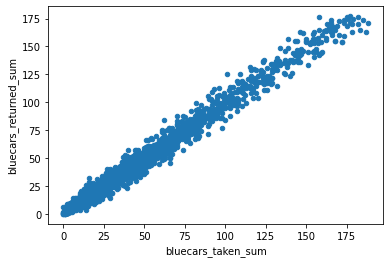

In [ ]:
auto[auto['bluecars_taken_sum'] < 2000].sample(2000).plot.scatter(x='bluecars_taken_sum', y='bluecars_returned_sum')

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = auto["bluecars_taken_sum"].corr(auto["bluecars_returned_sum"], method="pearson")
print(pearson_coeff)



0.9908674328686515


In [ ]:
# Checking whether you have to define the pearson
coeff =  auto["bluecars_taken_sum"].corr(auto["bluecars_returned_sum"]) 
print(coeff)

# Positive correlation is a relationship between two variables in which 
# both variables move in tandem—that is, in the same direction.
#  Corr above .50 (positive or negative) are considered strong. 
# Since the correlation coefficent of taken and returned blue cars is 0.99, 
# this means that taken and returned are highly correlated.

0.9908674328686515


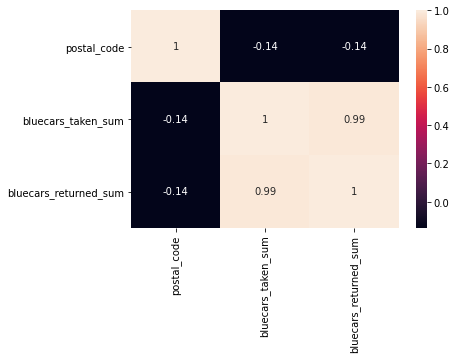

In [ ]:

sns.heatmap(auto.corr(),annot=True)
plt.show()

## Hypothesis testing

In [ ]:
auto. postal_code.value_counts()

94130    156
92400    156
92230    156
92270    156
92310    156
        ... 
75007      2
75014      2
75010      2
75018      2
75017      2
Name: postal_code, Length: 104, dtype: int64

In [ ]:
#  Comparing  X which is 92400 and Y area which is 94130
#  ho = mean of returned blue cars at 92400 = mean of 94130 returned cars
#  ha =   !ho
# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

x = auto.loc[(auto['postal_code'] == 92400) &  (auto['day_type'] == 'weekday')]
x.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
8876,92400,Monday,weekday,63,85
8877,92400,Tuesday,weekday,71,73
8878,92400,Wednesday,weekday,107,97
8879,92400,Thursday,weekday,67,70
8880,92400,Friday,weekday,97,92


In [ ]:
y = auto.loc[(auto['postal_code'] == 94130) &  (auto['day_type'] == 'weekday')]
y.head()

,postal_code,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
13590,94130,Monday,weekday,42,45
13591,94130,Tuesday,weekday,37,35
13592,94130,Wednesday,weekday,37,39
13593,94130,Thursday,weekday,30,28
13594,94130,Friday,weekday,48,39


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

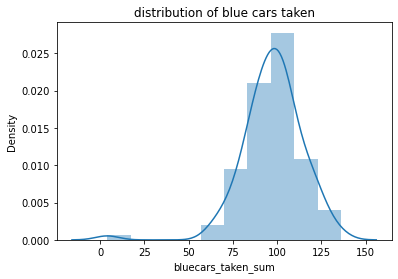

In [ ]:
# Plot bluecars taken
sns.distplot(x['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('(fail to reject H0)')
    else:
        print('(reject H0)')

In [ ]:
sample_size = 40
x_sampled = np.random.choice(x['bluecars_returned_sum'], sample_size)
y_sampled = np.random.choice(y['bluecars_returned_sum'], sample_size)
compare_2_groups(x_sampled, y_sampled, 0.05, sample_size)


Statistics=25.399, p=0.000
(reject H0)


## Point estimation

In [ ]:
# We use the "seed" value of 10. Follow this link to learn more about numpy seed. https://www.sharpsightlabs.com/blog/numpy-random-seed/
np.random.seed(10)
#Use the stats module to generate random variables for our population.
#Here we specify our abitrary mean height and a standard deviation, which are loc and scale respectively
population_mean = stats.norm.rvs(loc=46.82, scale=1, size=9305)
print ( population_mean )  

#Calculate the population mean
population_mean.mean()

[48.1515865  47.53527897 45.27459971 ... 47.45254909 45.89313185
 47.64747555]


46.82197052674391

In [ ]:
np.random.seed(6)
# Sample 1000 values
sample = np.random.choice(a= population_mean,
                               size=3500)            

# Show sample mean
print ( sample.mean() )                         

# calculate how much the estimated mean differs from the main mean
population_mean.mean() - sample.mean()

46.81085018348822


0.011120343255690557